In [1]:
import sys
sys.path.insert(0, '../../../network')
sys.path.insert(0, '../../../figures')
import color_scheme as cs
from transfer_functions import ErrorFunction

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# https://stackoverflow.com/questions/14708695/specify-figure-size-in-centimeter-in-matplotlib
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [4]:
data = np.load("data/data.npy", allow_pickle=True).item()

In [5]:
xi = data['xi']
overlaps = data['overlaps']
correlations = data['correlations']
state = data['state']
theta = data['phi']['theta']
sigma = data['phi']['sigma']

In [6]:
M = np.mean(state**2, axis=0)

In [7]:
phi = ErrorFunction(mu=theta, sigma=sigma).phi

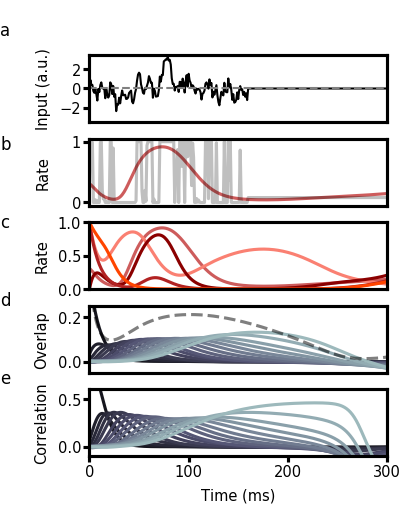

In [8]:
fig, ax = plt.subplots(5,1, figsize=cm2inch(7, 9), dpi=150)
fontsize = 7

n_idx = 24

# Panel a
#ax[0].plot(np.arange(0,T,0.1), np.repeat(p_input2[:,n_idx],10), color='k', linewidth=1); 
ax[0].plot(np.r_[xi[n_idx,:], np.zeros(140)], color='k', linewidth=1);
ax[0].axhline(0, linestyle='dashed', color='grey', linewidth=1)
ax[0].set_xlim([0,300])
ax[0].set_yticks([-2,0,2])
ax[0].set_ylim([-2.5,2.5])
#ax[0].annotate(r"$\xi^1$", xy=(2,-2.75), xycoords='data', fontsize=6)
#ax[0].annotate(r"$\xi^{16}$", xy=(142,1.60), xycoords='data', fontsize=6)

# Panel b
ax[1].plot(state[n_idx], color=cs.single_unit_colors()[0])
ax[1].plot(phi(np.r_[xi[n_idx,:], np.zeros(140)]), color='k', alpha=0.25)
ax[1].set_ylim([-0.05,1.05]);
ax[1].set_xlim([0,300]);

# Panel c
unit_idxs = [n_idx]+list(range(40, 44))
colors = cs.single_unit_colors()
for i, color in zip(unit_idxs, itertools.cycle(colors)):
    ax[2].plot(state[i], color=color)
ax[2].set_ylim([0,1]);
ax[2].set_xlim([0,300]);

# Panel d
for overlap, color in zip(overlaps, cs.overlap_colors(len(overlaps))):
    ax[3].plot(overlap, color=color)
ax[3].plot(M, color='k', alpha=0.5, linestyle='dashed')
ax[3].set_ylim([-0.05,0.25]);
ax[3].set_xlim([0,300]);


# Panel e
for overlap, color in zip(correlations, cs.overlap_colors(len(correlations))):
    ax[4].plot(overlap, color=color)
ax[4].set_ylim([-0.1,0.6]);
ax[4].set_xlim([0,300]);

#ax[1,0].plot()
#ax[0,1].plot()
#ax[1,1].plot()
#ax[0,2].plot()
#ax[1,2].plot()
for i in range(4):
    ax[i].set_xticks([]);
    #ax[i].set_xlabel("Time (ms)", fontsize=fontsize);
plt.subplots_adjust(hspace=0.25, wspace=0.35)
ax[4].set_xlabel("Time (ms)", fontsize=fontsize);

#ax[0,0].set_ylabel("Input (a.u.)", fontsize=fontsize);
ax[0].set_ylabel("Input (a.u.)", fontsize=fontsize);
ax[1].set_ylabel("Rate", fontsize=fontsize, labelpad=10);
ax[2].set_ylabel("Rate", fontsize=fontsize);
ax[3].set_ylabel("Overlap", fontsize=fontsize);
ax[4].set_ylabel("Correlation", fontsize=fontsize);

for axis in ax.flatten():
    #axis.tick_params(axis='both', labelsize=fontsize, )
    axis.tick_params(axis='both', which='major', labelsize=fontsize, width=1.5, length=3, pad=1)
    [i.set_linewidth(1.5) for i in axis.spines.values()]
ax[4].set_xticks([0,100,200,300])
ax[0].set_yticks([-2,0,2]);
ax[0].set_ylim([-3.5,3.5]);


ax[0].annotate("a", xy=(0.00,0.93), xycoords='figure fraction', fontsize=8)
ax[1].annotate("b", xy=(0.00,0.71), xycoords='figure fraction', fontsize=8)
ax[1].annotate("c", xy=(0.00,0.56), xycoords='figure fraction', fontsize=8)
ax[1].annotate("d", xy=(0.00,0.41), xycoords='figure fraction', fontsize=8)
ax[1].annotate("e", xy=(0.00,0.26), xycoords='figure fraction', fontsize=8)
plt.subplots_adjust(left=0.18)
    
plt.savefig("../output/1.pdf", bbox_inches='tight', dpi=150)